In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

import annModels as am

In [10]:
file_path = '../../data/dataS.csv'
df = pd.read_csv(file_path, parse_dates=['Date'])
#df = df.dropna()

#df = df[df['volatility_forcast'] <= 3]
#df = df[df['volatility'] <= 3]

df.head()

C:\Users\paula\AppData\Local\Temp\ipykernel_16808\3616236792.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = pd.read_csv(file_path, parse_dates=['Date'])


,Date,Open,High,Low,Close,SP500_Adj_Close,Volume,volatility,volatility_forcast,returns,GARCH_VM
0,0.0001273723092599669,0.047659,0.002928,0.001520,0.000581,0.048240,0.069794,0.066817,0.211467,0.548403,0.034344
1,0.0005094892370398676,0.047568,0.001414,0.002760,0.004918,0.052485,0.097281,0.211467,0.091160,0.646337,0.061825
2,0.0006368615462998344,0.051804,0.003021,0.000884,0.000582,0.051221,0.107127,0.091160,0.128589,0.522175,0.095679
3,0.0007642338555598013,0.050542,0.003392,0.000271,0.002023,0.048519,0.100136,0.128589,0.164762,0.489316,0.111924
4,0.0008916061648197682,0.047846,0.000419,0.002761,0.004340,0.052186,0.108488,0.164762,0.133090,0.633292,0.128721


In [11]:
target = 'volatility_forcast'
date='Date'

df=df.drop(columns=[date])

X = df.drop(columns=[target])
y = df[target]


In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
print(X_train.shape)
print(X_test.shape)

(4295, 9)
(1074, 9)


In [14]:
X_train = X_train.to_numpy()
y_train = y_train.to_numpy().reshape(-1, 1)

X_test  = X_test.to_numpy()
y_test  = y_test.to_numpy().reshape(-1, 1)

In [15]:
def normalize(X):
    return (X - np.mean(X, axis=0)) / np.std(X, axis=0)

In [16]:
X_train_normalized = normalize(X_train)
X_test_normalized = normalize(X_test)

mlp = am.MLP(n_input=9, n_hidden1=64, n_hidden2=32, n_output=1)
epochs = 5000
learning_rate = 0.001

#Training
history = mlp.train(X_train_normalized, y_train, epochs, learning_rate)

# Predict
train_preds = mlp.forward(X_train_normalized)
y_pred = mlp.forward(X_test_normalized)

# Losses
final_train_loss = np.mean((y_train - train_preds)**2)
final_test_loss  = np.mean((y_test  - y_pred)**2)

print("\nFinal Training Loss:", final_train_loss)
print("Final Test Loss:", final_test_loss)
print("Test Predictions:\n", y_pred)

Epoch 0, Loss: 0.9045
Epoch 1000, Loss: 0.0745
Epoch 2000, Loss: 0.0387
Epoch 3000, Loss: 0.0284
Epoch 4000, Loss: 0.0236

Final Training Loss: 0.02060014947320033
Final Test Loss: 0.02604966736879797
Test Predictions:
 [[ 0.0016507 ]
 [-0.13101645]
 [-0.07178687]
 ...
 [ 0.20379253]
 [ 0.17002378]
 [-0.01992638]]


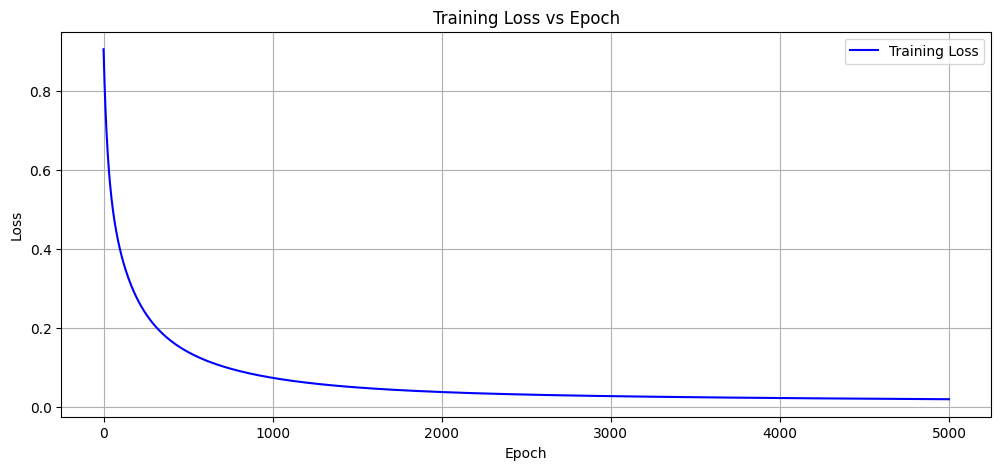

In [17]:
plt.figure(figsize=(12, 5))
plt.plot(history, label="Training Loss", color="blue")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training Loss vs Epoch")
plt.legend()
plt.grid(True)
plt.show()

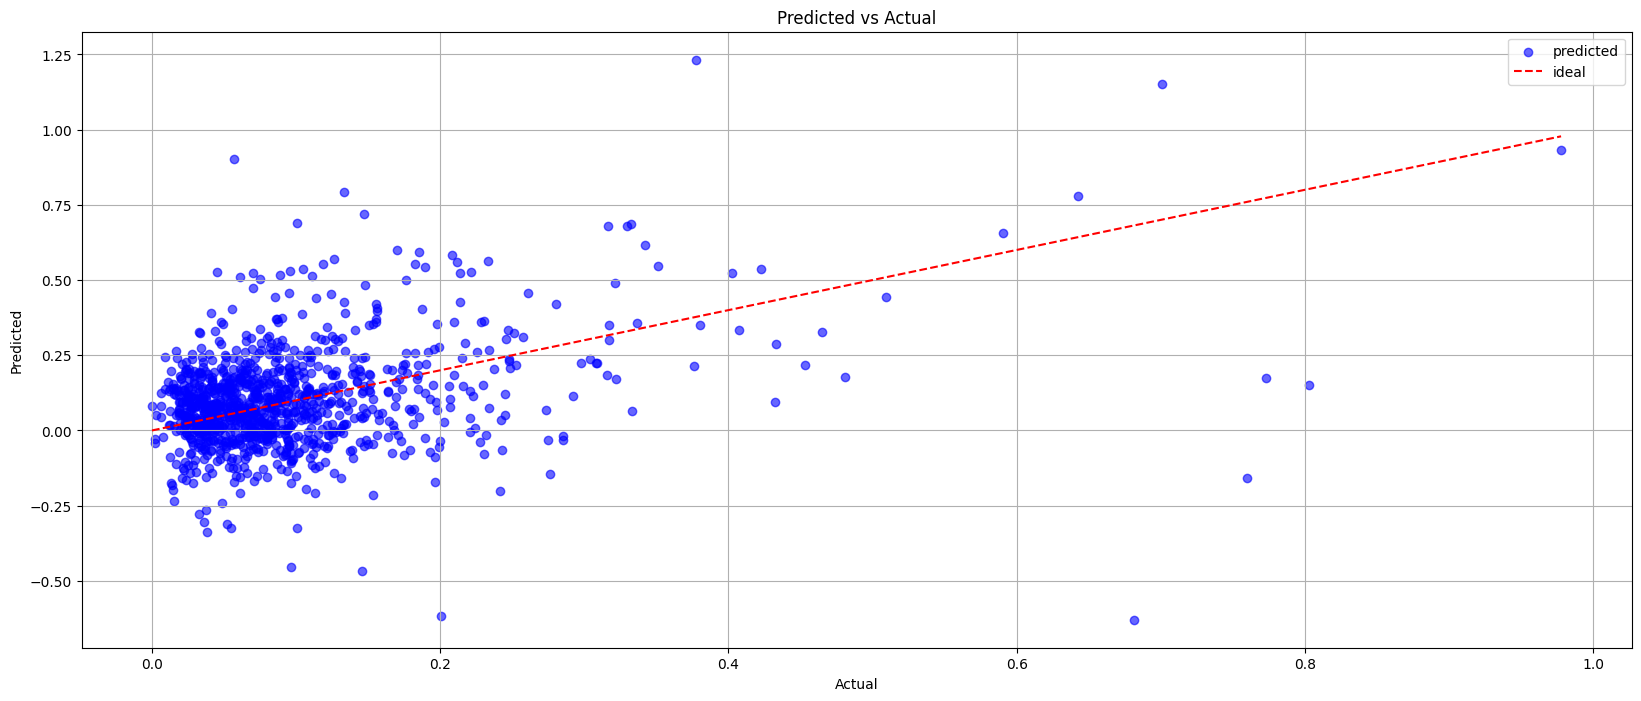

In [18]:
plt.figure(figsize=(20, 8))
plt.scatter(y_test, y_pred, alpha=0.6, color='blue', label="predicted")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label="ideal")
plt.title("Predicted vs Actual")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.legend()
plt.grid(True)
plt.show()
